# Modulok
## Modulok használata
Egy Python modul nem más mint függvények és osztályok összessége, amelyet egy csomagban kapunk meg. Természetesen mi magunk is tudunk (egyelőre Python nyelven) írni modulokat, amelyeket mások is használhatnak.

### Import
Ha telepítettük a Pythont, a bépített modulokat is megkapjuk. Ezeket egyszerűen tudjuk importálni, sőt sokat közülük már használtunk is.

In [1]:
import sys
print(sys.path)

['/home/wettl/bin/p3/lib/python36.zip', '/home/wettl/bin/p3/lib/python3.6', '/home/wettl/bin/p3/lib/python3.6/lib-dynload', '/usr/lib/python3.6', '', '/home/wettl/bin/p3/lib/python3.6/site-packages', '/home/wettl/bin/p3/lib/python3.6/site-packages/IPython/extensions', '/home/wettl/.ipython']


A `sys` egy beépített modul, a rendszerrel kapcsolatos információkat tudjuk lekérdezni és használni (pl. parancssori argumentumok). Fent a `sys.path` változót irattuk ki, mely azon könyvtárak listája, ahol pl. a Python a modulokat keresi. Az `import valami` sor végrehajtásakor a Python a `valami` nevű modult először a beépített modulok között keresi, majd egy `valami.py` nevű fájlt keres a `sys.path` helyek egyikén. A `sys.path` akár változtatható is.

Importálni lehet egy egész fájlt is, egy könyvtárat, a benne lévő fájlokkal, vagy akár egyetlen függvényt is. A következő betöltési módok a leggyakoribbak:
```Python
import <modul>
import <modul> as <name>
from <modul> import <identifier>
from <modul.identifier> import <identifier>
```
Például:

In [2]:
from csv import reader
from itertools import permutations
for p in permutations(['A', 'B', 'C']):
    print(p)

('A', 'B', 'C')
('A', 'C', 'B')
('B', 'A', 'C')
('B', 'C', 'A')
('C', 'A', 'B')
('C', 'B', 'A')


### Relatív import 
Importálhatunk fájlokat abból a könyvtárból, ahol éppen vagyunk, ahonnan a Python, ill. a jupyter fut.
Írjuk a következő kódot egy `myfns.py` nevű fájlba:
```Python
def foo():
    print("FoO")

def bar():
    print("BaR")
```
Ezután, betölthetjük őket az
```Python
import myfns
```
paranccsal, de ha csak az egyik függvényre van szükségünk, betölthetjük a következőképp:

In [3]:
from myfns import foo
foo()

FoO


## numpy alapok
A `numpy` numerikus számításokra tervezett [Python modul](https://numpy.org/). (Ha otthon szeretnénk használni, akkor az [Anaconda](https://www.anaconda.com/products/individual) ezt is tartalmazza mindhárom oprendszeren. Telepítés után keressünk egy szimpatikus mappát, ahova dolgozni szeretnénk, majd adjuk ki a `jupyter notebook` parancsot Windows command line-ban, illetve Linux parancssorban.)

Először importáljuk a `numpy` modult. Érdemes `import numpy as np` módon használni, hiszen ilyenkor `numpy` helyett elég az `np`.

A numpy legfontosabb összetevője az `array`, ami listák listájából 2D, listák listájánal listájából 3D... tömböt kreál (Python lista szteroidokon). A másik az `arange`, ami a `range`-hez hasonlóan működik, de azonnal tömböt hoz létre. Ez átméretezhető egy tömbbé a `reshape` függvénnyel:

In [4]:
import numpy as np
x = np.arange(1, -1, -0.2)
y = np.array([[1, 2, 3], [1, 2, 4]])
z = np.arange(8).reshape(2, 2, 2)

In [5]:
print(x)
print(y)
print(z)

[ 1.00000000e+00  8.00000000e-01  6.00000000e-01  4.00000000e-01
  2.00000000e-01  2.22044605e-16 -2.00000000e-01 -4.00000000e-01
 -6.00000000e-01 -8.00000000e-01]
[[1 2 3]
 [1 2 4]]
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


In [6]:
print(x.dtype, y.dtype, z.dtype)
print(x.ndim, y.ndim, z.ndim)
print(x.shape, y.shape, z.shape)

float64 int64 int64
1 2 3
(10,) (2, 3) (2, 2, 2)


A `numpy.ndarray` típusú változókon végezhetünk műveleteket, sőt, az alapműveletek többsége működik, de az ökölszabály az, hogy elemenként értelmezzük őket.

In [7]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
print(a + b)
print(a - b)
print(b / (b+1.0))

[20 31 42 53]
[20 29 38 47]
[0.         0.5        0.66666667 0.75      ]


Hasonlóan lista és egy elem között is értelmezzük az alapműveleteket. Ilyenkor a lista minden elemére elvégezzük a műveleteket és az eredmény ez a lista.

In [8]:
b = np.arange(10)
print(b)
print(b ** 2)
print(b + 10)
print(b % 3 == 1)

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]
[10 11 12 13 14 15 16 17 18 19]
[False  True False False  True False False  True False False]


Az előzőekből szinte kikövetkeztethető, hogy a mátrixszorzás sem a `*` művelettel történik, helyette a `@` művelet vagy a `.dot` metódus használható:

In [9]:
A = np.arange(2, 6).reshape(2, 2)
B = np.arange(3, -1, -1).reshape(2, 2)
print(A)
print(B)

[[2 3]
 [4 5]]
[[3 2]
 [1 0]]


In [10]:
print(A * B)     # elementwise
print(A @ B)     # matrix product
print(A.dot(B))  # matrix product

[[6 6]
 [4 0]]
[[ 9  4]
 [17  8]]
[[ 9  4]
 [17  8]]


A Python indexelési lehetőségei mellett további kényelmes megoldások is használhatók:

In [11]:
x = np.arange(15).reshape(3, 5)
print(x)
print(x[0:2])

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[[0 1 2 3 4]
 [5 6 7 8 9]]


Sőt, indexelhetünk oszlopszinten is.

In [12]:
print(x[2, :3])
print(x[:, 3]) 

[10 11 12]
[ 3  8 13]


In [13]:
print(x[:, [3]])

[[ 3]
 [ 8]
 [13]]


In [14]:
a = np.arange(12)**2
i = np.array([1, 5, 1, 3, 8])
print(a[i])

[ 1 25  1  9 64]


Függvényeket is hívhatunk elemenként. Sőt, a listaműveletek is elérhetők, persze `np` előtaggal, hiszen `array` típusra a normál Python függvények nem működnek. Átlagot, szórást is egy sorban számolhatunk.

In [15]:
x = np.log(np.arange(2, 10, 0.5))
print(x)
print(x.sum())
print(x.mean())
print(x.std())

[0.69314718 0.91629073 1.09861229 1.25276297 1.38629436 1.5040774
 1.60943791 1.70474809 1.79175947 1.87180218 1.94591015 2.01490302
 2.07944154 2.14006616 2.19722458 2.2512918 ]
26.457769829012314
1.6536106143132696
0.4600673068044455


A mátrixalapú nyelvek (Octave, Matlab) több parancsa itt is megjelenik: működik a `zeros` és a `ones`, az identikus mátrix az `eye` mögött rejtőzik (`I`, ejtsd *áj*, `eye` ejtsd *áj*).

In [16]:
print(np.zeros([2, 3]))
print(np.ones([3, 1]))      # float type
print(np.eye(4, dtype=int)) # int type

[[0. 0. 0.]
 [0. 0. 0.]]
[[1.]
 [1.]
 [1.]]
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


Véletlen számokat, sőt véletlen vektorokat vagy mátrixokat is generálhatunk. Itt a $[0,1)$ intervallumból egyenletes eloszlás szerint:

In [17]:
np.random.rand(3,4)

array([[0.49897635, 0.66638168, 0.77270834, 0.82361229],
       [0.93191118, 0.39355394, 0.4963949 , 0.92097115],
       [0.79365428, 0.67619434, 0.87235446, 0.48870652]])

Mindig ugyanazt a sorozatot generálja, ha előtte beállítjuk a `seed` értékét:

In [18]:
np.random.seed(2)
np.random.rand(2,3)

array([[0.4359949 , 0.02592623, 0.54966248],
       [0.43532239, 0.4203678 , 0.33033482]])

Egészek sorozata is generálható, például kockadobások:

In [19]:
np.random.randint(1,7,10)

array([4, 6, 3, 5, 5, 5, 6, 4, 5, 3])

## Plot
Függvények ábrázolására a [matplotlib](https://matplotlib.org/) csomagot használjuk. A matplotlib használatának módja változtatható a `%matplotlib` ún. *magic* függvénnyel. (A *magic* függvények az IPython függvényei, melyekkel a környezet viselkedése kezelhető, ezek egy részét a `jupyter` is használja.)

In [20]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

Először egy egyszerű plot.

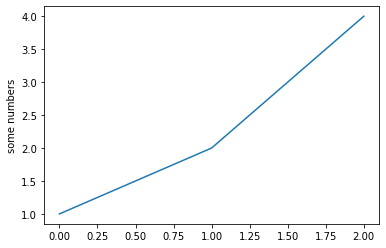

In [21]:
plt.plot([1,2,4])
plt.ylabel('some numbers')
plt.show()

Látjuk, hogy nem szinbolikusan számol, hanem egyszerűen összeköti a számokat vonalakkal. Szinuszgörbét is hasonlóan rajzolunk. Az `np.sin` a lista minden elemére számol szinuszt. Itt az `arange` helyett inkább a `linspace` függvényt használjuk, mely adott intervallumon helyez el adott számú osztópontot:

In [22]:
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

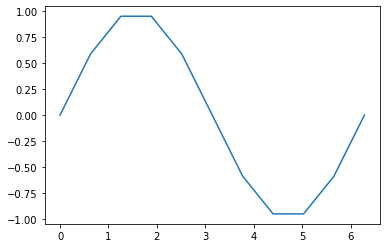

In [23]:
plt.plot(np.linspace(0, 2*np.pi, 11), 
         np.sin(np.linspace(0, 2*np.pi, 11)))
plt.show()

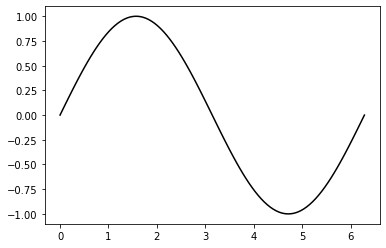

In [24]:
plt.plot(np.linspace(0, 2*np.pi, 101), 
         np.sin(np.linspace(0, 2*np.pi, 101)), 'k')
plt.show()

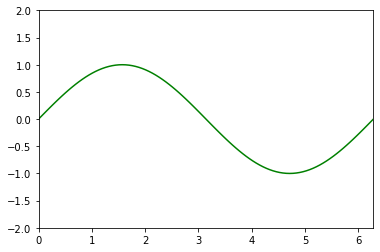

In [25]:
plt.plot(np.linspace(0, 2*np.pi, 101), 
         np.sin(np.linspace(0, 2*np.pi, 101)), 'g')
plt.axis([0, 2*np.pi, -2, 2])
plt.show()

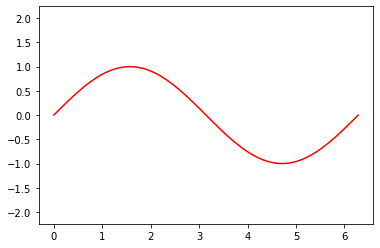

In [26]:
plt.plot(np.linspace(0, 2*np.pi, 101), 
         np.sin(np.linspace(0, 2*np.pi, 101)), 'r')
plt.axis('equal')
plt.show()

És a végére egy kis Monte–Carlo-módszer. Generálunk véletlen pontokat a $[-2,2]\times[0,1]$ téglalapban. A $[0,1]$ intervallumon egyenletes eloszlás szerint generált véletlen számokból egyszerű transzformációval kaphatunk a $[-2,2]$ intervallumon egyenletes eloszlásúakat. A `J` tömbben azon $(x,y)$ pontok indexeit tároljuk, ahol $e^{-x^2} > y$. Mivel a téglalap területe 4, az ilyen pontok aránya az teljes ponthalmazon belül, néggyel szorozva egy közelítést ad $\int_{-2}^2e^{-x^2}\,\mathrm{d}x$-re.

In [27]:
a = np.arange(4).reshape(2, 2)
print(a)
print((np.where(a % 2)))
b = np.arange(4)
print(b)
print((np.where(b % 2)))

[[0 1]
 [2 3]]
(array([0, 1]), array([1, 1]))
[0 1 2 3]
(array([1, 3]),)


In [28]:
n = 500000
X = np.random.rand(n, 2)
X[:, 0] = X[:, 0]*4-2
J = np.where(X[:, 1] < np.exp(-X[:, 0]**2))[0]
print(4 * len(J) / n)

1.757776


Nézzük meg rajzon.

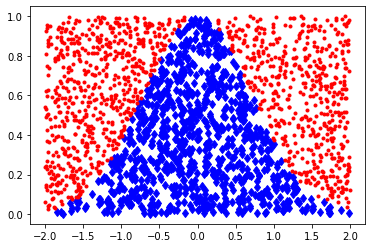

In [29]:
Xp = X[:2000]
Ip = [i for i in range(2000) if i in J]
Inp = [i for i in range(2000) if i not in J]
plt.plot(Xp[Ip, 0], Xp[Ip, 1], 'bd', Xp[Inp, 0], Xp[Inp, 1], 'r.')
plt.show()